<a href="https://colab.research.google.com/github/hodangtu01/HOMEWORK1---AI/blob/main/MINIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

# coment
(train_images, train_labels),(test_images,test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
train_images.shape
# 28 x 28 pixel ==> được coi như là 28 pixel là đầu vào

(60000, 28, 28)

In [4]:
train_labels.shape

(60000,)

Số này là: 9


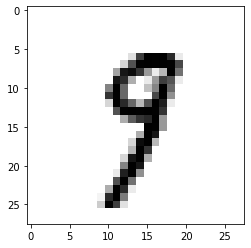

In [5]:
# Hiển thị giá trị
hinh = train_images[43]
plt.imshow(hinh, cmap = plt.cm.binary)
plt.show
print('Số này là:',train_labels[43])

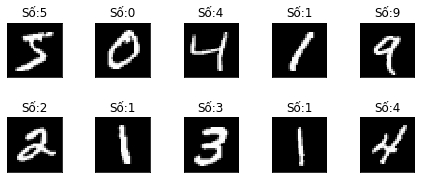

In [6]:
for i in range(10):
  plt.subplot(3,5,i+1) # 3 hàng, 5 cột
  plt.tight_layout()
  plt.imshow(train_images[i], cmap = 'gray', interpolation = 'none')
  plt.title('Số:{}'.format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

In [7]:
from keras import models
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

model =  models.Sequential()
model.add(Dense(512,input_shape=(784,),activation='relu'))
model.add(Dense(10, activation = 'softmax'))
# Tach anh mang hai chieu ve thanh 1 hang
train_images = train_images.reshape(60000,784, 1) #28*28 = 784
train_images = train_images.astype('float32')/255
# Chuyen sang so thuc chia 255 = float32, ban dau la int

test_images = test_images.reshape(10000,784, 1)
test_images = test_images.astype('float32')/255




In [8]:
# Lenh chuyen sang one heat encoding
from keras.utils import to_categorical
train_label = to_categorical(train_labels, 10)
test_label  = to_categorical(test_labels, 10)

In [42]:
# Bước 2: Compile - Biên dịch
# Bo toi uu rmsprop; Bo mat mat categorical_cross entropy; Do chinh xac
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy',metrics = ['accuracy'])
model.fit(train_images, train_label, epochs = 50, batch_size = 128)
# train 10 lan, moi lan hoc batch_size 128 du lieu trong 10000
test_loss, test_acc = model.evaluate(test_images, test_label)
print('test_accuracy',test_acc)
print('test_loss:',test_loss)

Epoch 1/50
469/469 [==============================] - 7s 11ms/step - loss: 0.0074 - accuracy: 0.9984
Epoch 2/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0050 - accuracy: 0.9991
Epoch 3/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0035 - accuracy: 0.9994
Epoch 4/50
469/469 [==============================] - 5s 10ms/step - loss: 0.0023 - accuracy: 0.9997
Epoch 5/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0015 - accuracy: 0.9999
Epoch 6/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0010 - accuracy: 0.9998
Epoch 7/50
469/469 [==============================] - 4s 9ms/step - loss: 7.3225e-04 - accuracy: 1.0000
Epoch 8/50
469/469 [==============================] - 4s 8ms/step - loss: 5.1026e-04 - accuracy: 1.0000
Epoch 9/50
469/469 [==============================] - 4s 9ms/step - loss: 4.4655e-04 - accuracy: 1.0000
Epoch 10/50
469/469 [==============================] - 4s 9ms/step - loss: 3.3720e-04

1/1 [==============================] - 0s 33ms/step
Số dự đoán được là: 9


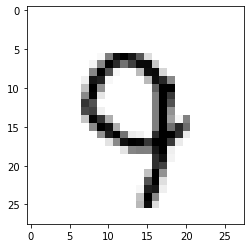

In [75]:
# Thu mo hinh
#image_test = 76
#image_test = test_images[image_test, :, :].reshape(-1,1) ==> 1 và -1
#pre_image = np.argmax(model.predict(image_test))
#plt.imshow(image_test.reshape(28,28), cmap='binary')
#print('pre:',pre_image)
image_test = 999
image_test = test_images[image_test, :, :].reshape(1, -1)
pre_image = np.argmax(model.predict(image_test))
plt.imshow(image_test.reshape(28,28), cmap='binary')
print('Số dự đoán được là:',pre_image)




1/1 [==============================] - 0s 33ms/step
Số dự đoán được là: 9


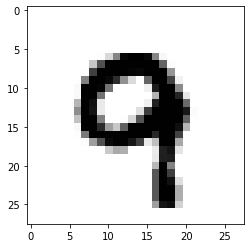

In [76]:
image_test = 99
image_test = test_images[image_test, :, :].reshape(1, -1)
pre_image = np.argmax(model.predict(image_test))
plt.imshow(image_test.reshape(28,28), cmap='binary')
print('Số dự đoán được là:',pre_image)

In [ ]:
# Lưu tham số vào 1 file
model.save('model1.hs')